In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("houses_to_rent.csv")

In [48]:
df.head(10)

,ID,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"
6,6,1,55,1,1,1,2,acept,furnished,"R$1,950","R$5,000",R$375,R$64,"R$7,389"
7,7,1,55,2,2,1,2,acept,not furnished,R$600,"R$1,300",R$67,R$17,"R$1,984"
8,8,1,82,3,1,1,3,acept,furnished,R$828,"R$2,000",R$109,R$26,"R$2,963"
9,9,1,32,1,1,1,16,acept,not furnished,R$533,"R$2,900",R$0,R$37,"R$3,470"


In [49]:
df.drop(['ID'],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 17 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int64
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
Hassoc_tax        6080 non-null object
rent              6080 non-null object
prop_tax          6080 non-null object
fire_insur        6080 non-null object
dtypes: int64(6), object(11)
memory usage: 807.6+ KB


In [51]:
df.loc[df['floor'] == '-', 'floor'] = 0
df['floor'] = df['floor'].astype('int64')

df['Hassoc_tax'] = df['hoa'].apply(lambda x: x.split('$')[-1])

df['rent'] = df['rent amount'].apply(lambda x: x.split('$')[-1])

df['prop_tax'] = df['property tax'].apply(lambda x: x.split('$')[-1])

df['fire_insur'] = df['fire insurance'].apply(lambda x: x.split('$')[-1])

In [76]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total,Hassoc_tax,rent,prop_tax,fire_insur
0,1,240,3,3,4,0,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121",0,"8,000","1,000",121
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493",540,820,122,11
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680","4,172","7,000","1,417",89
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116",700,"1,250",150,16
4,1,19,1,1,0,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257",0,"1,200",41,16
5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270",0,"2,200",42,28
6,1,55,1,1,1,2,acept,furnished,"R$1,950","R$5,000",R$375,R$64,"R$7,389","1,950","5,000",375,64
7,1,55,2,2,1,2,acept,not furnished,R$600,"R$1,300",R$67,R$17,"R$1,984",600,"1,300",67,17
8,1,82,3,1,1,3,acept,furnished,R$828,"R$2,000",R$109,R$26,"R$2,963",828,"2,000",109,26
9,1,32,1,1,1,16,acept,not furnished,R$533,"R$2,900",R$0,R$37,"R$3,470",533,"2,900",0,37


In [77]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total', 'Hassoc_tax', 'rent', 'prop_tax',
       'fire_insur'],
      dtype='object')

In [78]:
df_out = df[['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture', 'Hassoc_tax', 'rent', 'prop_tax', 'fire_insur']]

In [79]:
df_out.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Hassoc_tax,rent,prop_tax,fire_insur
0,1,240,3,3,4,0,acept,furnished,0,"8,000","1,000",121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11
2,1,443,5,5,4,3,acept,furnished,"4,172","7,000","1,417",89
3,1,73,2,2,1,12,acept,not furnished,700,"1,250",150,16
4,1,19,1,1,0,0,not acept,not furnished,0,"1,200",41,16
5,1,13,1,1,0,2,acept,not furnished,0,"2,200",42,28
6,1,55,1,1,1,2,acept,furnished,"1,950","5,000",375,64
7,1,55,2,2,1,2,acept,not furnished,600,"1,300",67,17
8,1,82,3,1,1,3,acept,furnished,828,"2,000",109,26
9,1,32,1,1,1,16,acept,not furnished,533,"2,900",0,37


In [56]:
print(df_out['animal'].unique())
print(df_out.furniture.unique())

['acept' 'not acept']
['furnished' 'not furnished']


In [80]:
df_out['rent'] = df_out['rent'].apply(lambda x: x.replace(',',''))
df_out['Hassoc_tax'] = df_out['Hassoc_tax'].apply(lambda x: x.replace(',',''))
df_out['prop_tax'] = df_out['prop_tax'].apply(lambda x: x.replace(',',''))
df_out['fire_insur'] = df_out['fire_insur'].apply(lambda x: x.replace(',',''))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [81]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 12 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int64
animal            6080 non-null object
furniture         6080 non-null object
Hassoc_tax        6080 non-null object
rent              6080 non-null object
prop_tax          6080 non-null object
fire_insur        6080 non-null object
dtypes: int64(6), object(6)
memory usage: 570.1+ KB


In [82]:
df_out['Hassoc_tax'].unique()

array(['0', '540', '4172', ..., '4916', '3640', '1764'], dtype=object)

In [86]:
df_out['rent'] = df_out['rent'].astype('int64')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_out.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Hassoc_tax,rent,prop_tax,fire_insur
0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16
4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16
5,1,13,1,1,0,2,acept,not furnished,0,2200,42,28
6,1,55,1,1,1,2,acept,furnished,1950,5000,375,64
7,1,55,2,2,1,2,acept,not furnished,600,1300,67,17
8,1,82,3,1,1,3,acept,furnished,828,2000,109,26
9,1,32,1,1,1,16,acept,not furnished,533,2900,0,37


Checking for Outliers

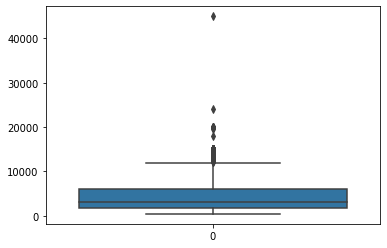

In [88]:
sns.boxplot(data=df_out['rent'])

In [89]:
df1 = df_out.copy()

In [90]:
df1.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Hassoc_tax,rent,prop_tax,fire_insur
0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16
4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16
5,1,13,1,1,0,2,acept,not furnished,0,2200,42,28
6,1,55,1,1,1,2,acept,furnished,1950,5000,375,64
7,1,55,2,2,1,2,acept,not furnished,600,1300,67,17
8,1,82,3,1,1,3,acept,furnished,828,2000,109,26
9,1,32,1,1,1,16,acept,not furnished,533,2900,0,37


In [91]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 12 columns):
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int64
animal            6080 non-null object
furniture         6080 non-null object
Hassoc_tax        6080 non-null object
rent              6080 non-null int64
prop_tax          6080 non-null object
fire_insur        6080 non-null object
dtypes: int64(7), object(5)
memory usage: 570.1+ KB


In [93]:
df2 = remove_outlier(df1, 'rent')

Text(0.5, 1.0, 'After Removing Outliers')

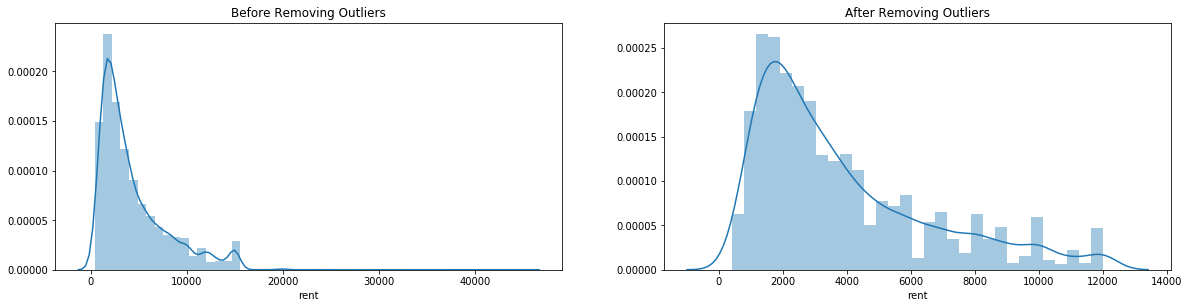

In [94]:
# Lets take a look on how our data was distributed before and after treat outliers

plt.figure(1, figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.distplot(df_out['rent'])
plt.title('Before Removing Outliers')
plt.subplot(2, 2, 2)
sns.distplot(df2['rent'])
plt.title('After Removing Outliers')

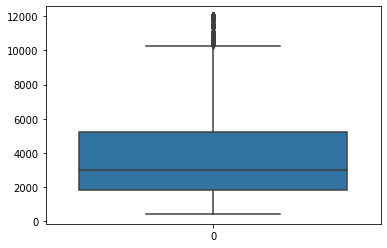

In [96]:
sns.boxplot(data=df2['rent'])

In [99]:
df2.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Hassoc_tax,rent,prop_tax,fire_insur
0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16
4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16
5,1,13,1,1,0,2,acept,not furnished,0,2200,42,28
6,1,55,1,1,1,2,acept,furnished,1950,5000,375,64
7,1,55,2,2,1,2,acept,not furnished,600,1300,67,17
8,1,82,3,1,1,3,acept,furnished,828,2000,109,26
9,1,32,1,1,1,16,acept,not furnished,533,2900,0,37


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779 entries, 0 to 6079
Data columns (total 12 columns):
city              5779 non-null int64
area              5779 non-null int64
rooms             5779 non-null int64
bathroom          5779 non-null int64
parking spaces    5779 non-null int64
floor             5779 non-null int64
animal            5779 non-null object
furniture         5779 non-null object
Hassoc_tax        5779 non-null object
rent              5779 non-null int64
prop_tax          5779 non-null object
fire_insur        5779 non-null object
dtypes: int64(7), object(5)
memory usage: 746.9+ KB


In [101]:
df2.to_csv("houses_to_rent_cleaned.csv",index=False)